In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: better visuals
sns.set(style="whitegrid")

# Load data
df = pd.read_csv("../data/processed/cleaned_vehicles.csv")

print("Shape:", df.shape)
df.head()


Shape: (392117, 27)


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,vehicle_age
0,7316814884,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,...,pickup,white,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04 17:31:18+00:00,11.0
1,7316814758,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,...,pickup,blue,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04 17:31:08+00:00,15.0
2,7316814989,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,...,pickup,red,https://images.craigslist.org/01212_jjirIWa0y0...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04 17:31:25+00:00,5.0
3,7316743432,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,...,pickup,red,https://images.craigslist.org/00x0x_1y9kIOzGCF...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04 15:41:31+00:00,8.0
4,7316356412,https://auburn.craigslist.org/cto/d/auburn-uni...,auburn,https://auburn.craigslist.org,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,...,truck,black,https://images.craigslist.org/00404_l4loxHvdQe...,2013 F-150 XLT V6 4 Door. Good condition. Leve...,NaN,al,32.592,-85.5189,2021-05-03 19:02:03+00:00,12.0


In [2]:
def summary(data):
    print(f"Dataset has {data.shape[1]} features and {data.shape[0]} rows.\n")
    
    summary_df = pd.DataFrame(index=data.columns)
    summary_df["Unique"] = data.nunique()
    summary_df["Missing"] = data.isnull().sum()
    summary_df["Missing %"] = round((data.isnull().sum()/len(data))*100, 2)
    summary_df["Type"] = data.dtypes
    
    return summary_df

summary(df)


Dataset has 27 features and 392117 rows.



,Unique,Missing,Missing %,Type
id,392117,0,0.00,int64
url,392117,0,0.00,object
region,404,0,0.00,object
region_url,413,0,0.00,object
price,15331,0,0.00,int64
year,112,0,0.00,float64
manufacturer,42,14821,3.78,object
model,27955,4538,1.16,object
condition,6,149819,38.21,object
cylinders,8,160086,40.83,object


In [3]:
def percent_value_counts(data, feature):
    total = data[feature].value_counts(dropna=False)
    percent = round(data[feature].value_counts(dropna=False, normalize=True) * 100, 2)

    return pd.DataFrame({
        "Total": total,
        "Percent (%)": percent
    })

percent_value_counts(df, "state")


,Total,Percent (%)
state,,
ca,45128,11.51
fl,27199,6.94
tx,21289,5.43
ny,17864,4.56
oh,16623,4.24
mi,16415,4.19
or,14217,3.63
pa,12877,3.28
nc,12668,3.23


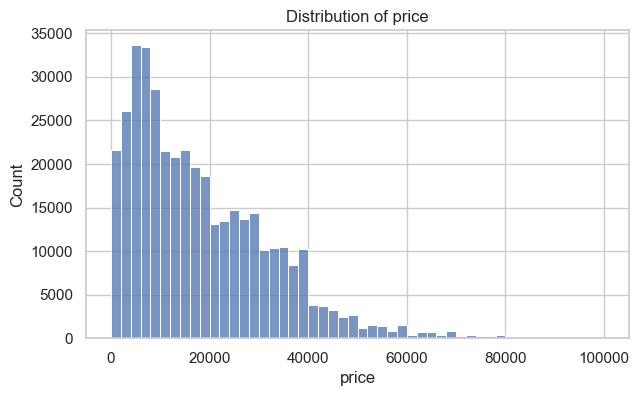

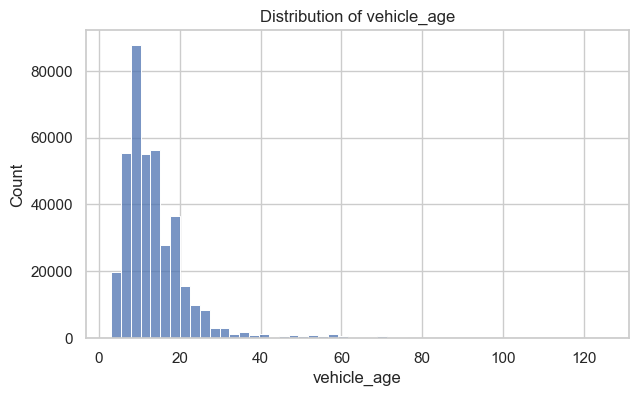

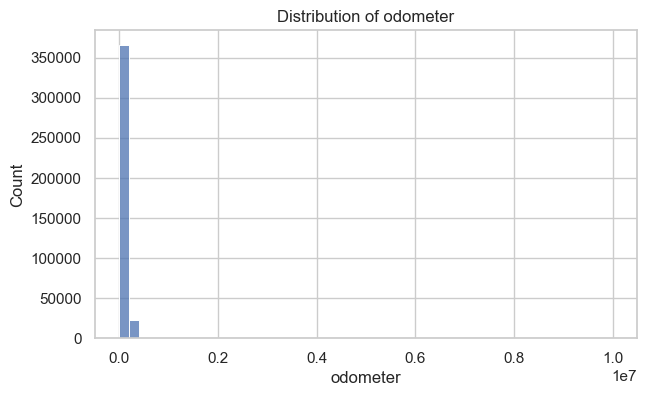

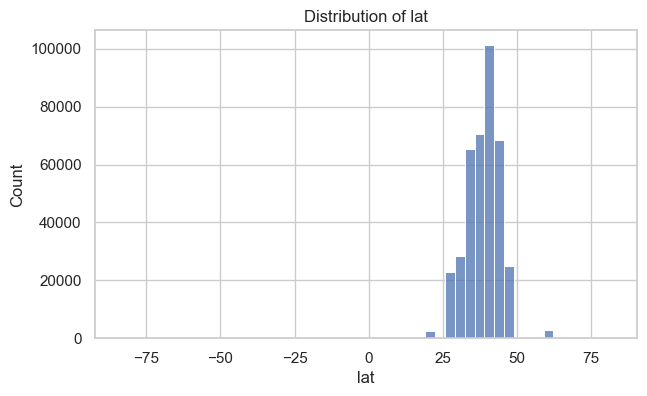

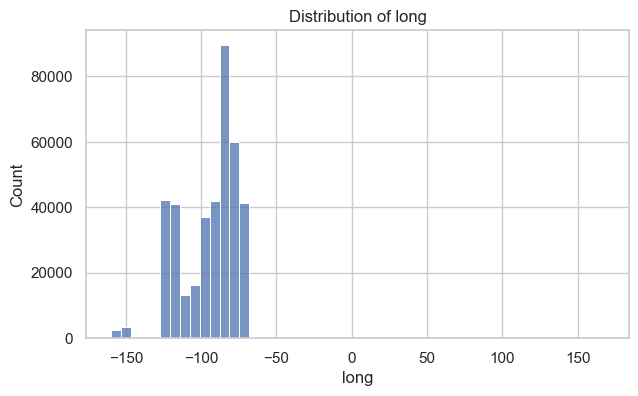

In [4]:
numeric_cols = [
    "price",
    "vehicle_age",
    "odometer",
    "lat",
    "long"
]

for col in numeric_cols:
    if col in df.columns:
        plt.figure(figsize=(7,4))
        sns.histplot(df[col].dropna(), bins=50)
        plt.title(f"Distribution of {col}")
        plt.show()


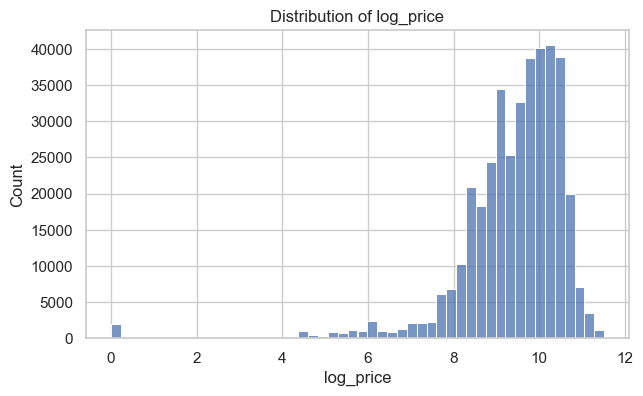

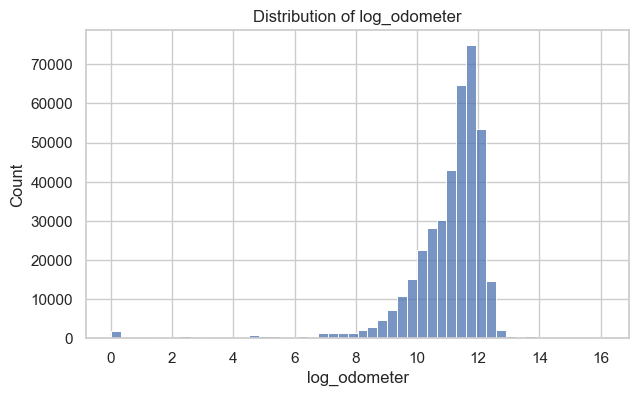

In [5]:
df = df[df["price"] > 0]
df["log_price"] = np.log(df["price"])

df = df[df["odometer"] > 0]
df["log_odometer"] = np.log(df["odometer"])

log_cols = ["log_price", "log_odometer"]

for col in log_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col].dropna(), bins=50)
    plt.title(f"Distribution of {col}")
    plt.show()


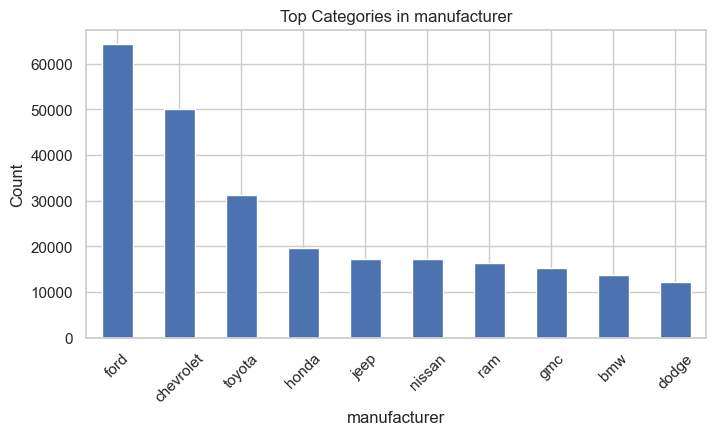

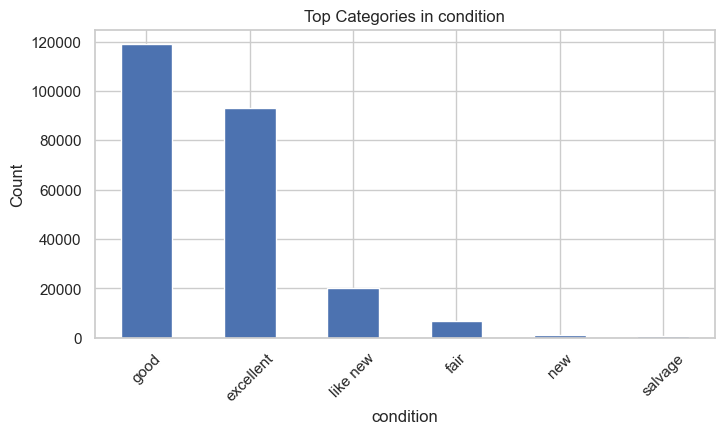

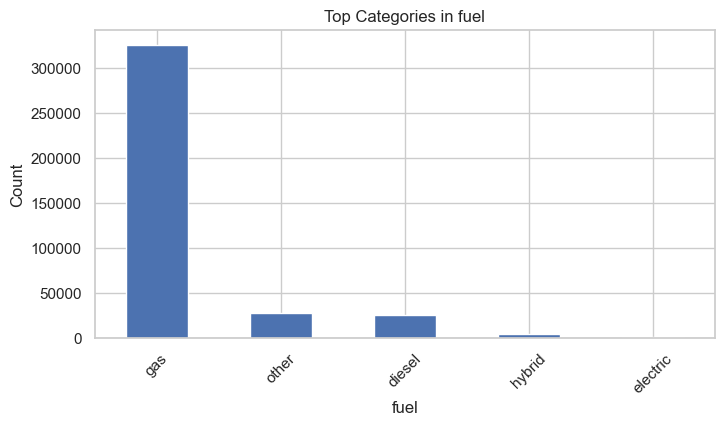

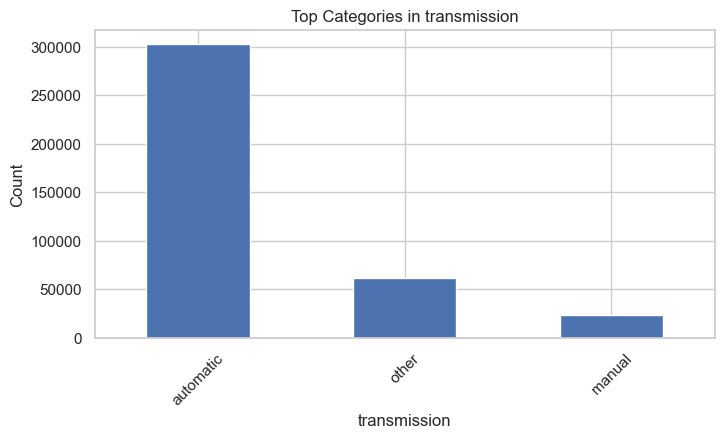

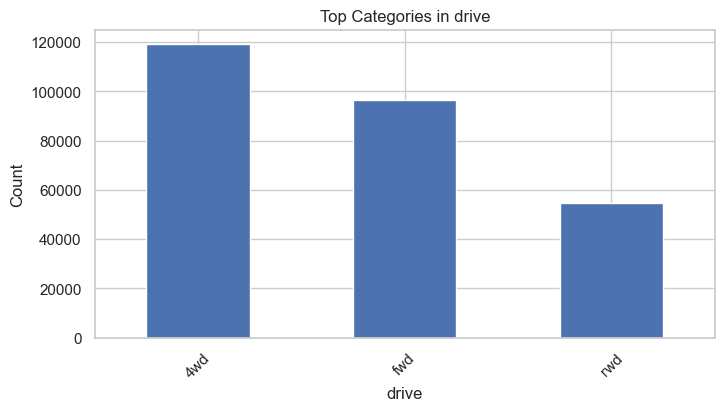

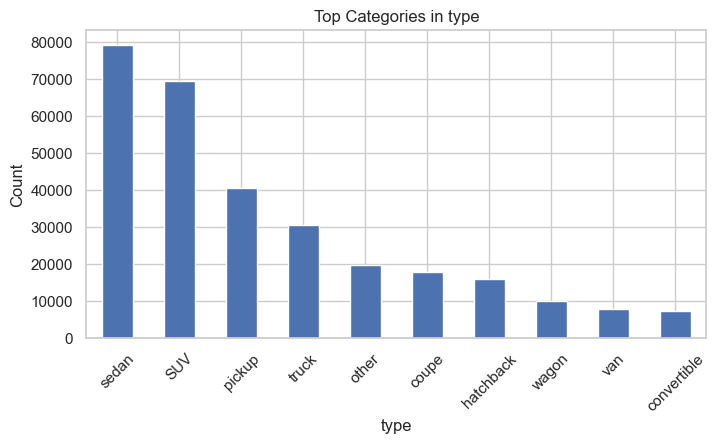

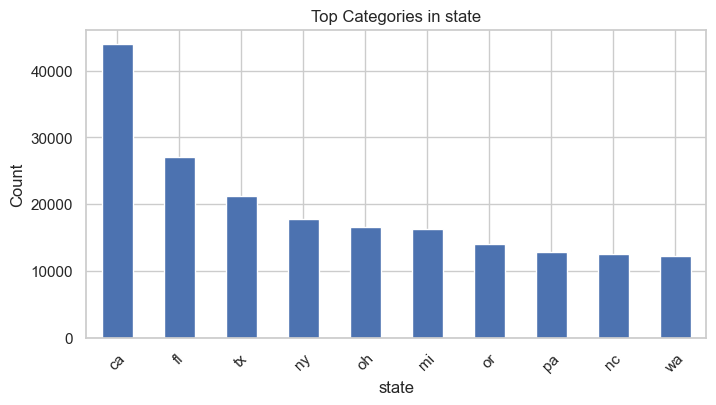

In [6]:
categorical_cols = [
    "manufacturer",
    "condition",
    "fuel",
    "transmission",
    "drive",
    "type",
    "state"
]

for col in categorical_cols:
    if col in df.columns:
        plt.figure(figsize=(8,4))
        df[col].value_counts().head(10).plot(kind="bar")
        plt.title(f"Top Categories in {col}")
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.show()


In [7]:
for col in categorical_cols:
    if col in df.columns:
        print(f"\n--- {col} Distribution (%) ---")
        print(round(df[col].value_counts(normalize=True).head(10) * 100, 2))



--- manufacturer Distribution (%) ---
manufacturer
ford         17.18
chevrolet    13.37
toyota        8.37
honda         5.27
jeep          4.62
nissan        4.61
ram           4.36
gmc           4.08
bmw           3.66
dodge         3.27
Name: proportion, dtype: float64

--- condition Distribution (%) ---
condition
good         49.49
excellent    38.71
like new      8.32
fair          2.79
new           0.46
salvage       0.25
Name: proportion, dtype: float64

--- fuel Distribution (%) ---
fuel
gas         84.38
other        7.23
diesel       6.72
hybrid       1.26
electric     0.42
Name: proportion, dtype: float64

--- transmission Distribution (%) ---
transmission
automatic    78.09
other        15.83
manual        6.08
Name: proportion, dtype: float64

--- drive Distribution (%) ---
drive
4wd    44.11
fwd    35.72
rwd    20.17
Name: proportion, dtype: float64

--- type Distribution (%) ---
type
sedan          26.10
SUV            22.86
pickup         13.36
truck          10.03
o

In [12]:
import pandas as pd
import numpy as np
from datetime import datetime

RAW_DATA_PATH = "../data/raw/vehicles.csv"
PROCESSED_DATA_PATH = "../data/processed/cleaned_vehicles.csv"



In [13]:
df = pd.read_csv(RAW_DATA_PATH)
df.head()


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [14]:
def summary(data):
    print(f"Dataset has {data.shape[1]} features and {data.shape[0]} rows.\n")
    
    summary_df = pd.DataFrame(index=data.columns)
    summary_df["Unique"] = data.nunique()
    summary_df["Missing"] = data.isnull().sum()
    summary_df["Missing %"] = round((data.isnull().sum()/len(data))*100, 2)
    summary_df["Type"] = data.dtypes
    
    return summary_df

summary(df)


Dataset has 26 features and 426880 rows.



,Unique,Missing,Missing %,Type
id,426880,0,0.00,int64
url,426880,0,0.00,object
region,404,0,0.00,object
region_url,413,0,0.00,object
price,15655,0,0.00,int64
year,114,1205,0.28,float64
manufacturer,42,17646,4.13,object
model,29667,5277,1.24,object
condition,6,174104,40.79,object
cylinders,8,177678,41.62,object


In [17]:
df.head(100)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7309798041,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,2100,2006.0,subaru,impreza,fair,4 cylinders,...,NaN,hatchback,NaN,https://images.craigslist.org/00606_6sZwmmrJ9r...,Looking to sell my 2006 Subaru Impreza hatchba...,NaN,al,32.5475,-85.4682,2021-04-20T09:55:48-0500
96,7309361405,https://auburn.craigslist.org/cto/d/valley-one...,auburn,https://auburn.craigslist.org,80,2004.0,honda,NaN,excellent,6 cylinders,...,NaN,NaN,NaN,https://images.craigslist.org/00p0p_awopHVeMR8...,Asking $800 Loaded 2004 Honda Accord EX-L! 94k...,NaN,al,32.8113,-85.1749,2021-04-19T12:55:06-0500
97,7309271279,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,15990,2016.0,NaN,Scion iM Hatchback 4D,good,NaN,...,NaN,hatchback,blue,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,NaN,al,32.5900,-85.4800,2021-04-19T10:51:13-0500
98,7309271051,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,20590,2013.0,acura,mdx sport utility 4d,good,6 cylinders,...,NaN,other,silver,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,NaN,al,32.5900,-85.4800,2021-04-19T10:50:57-0500


In [18]:
df["posting_date"] = pd.to_datetime(
    df["posting_date"],
    errors="coerce",
    utc=True
)

df = df.dropna(subset=["posting_date", "price", "year"])
df = df[df["price"] > 0]


In [19]:
df.head(100)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
27,7316814884,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,...,NaN,pickup,white,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04 17:31:18+00:00
28,7316814758,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,...,NaN,pickup,blue,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04 17:31:08+00:00
29,7316814989,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,...,NaN,pickup,red,https://images.craigslist.org/01212_jjirIWa0y0...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04 17:31:25+00:00
30,7316743432,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,...,NaN,pickup,red,https://images.craigslist.org/00x0x_1y9kIOzGCF...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04 15:41:31+00:00
31,7316356412,https://auburn.craigslist.org/cto/d/auburn-uni...,auburn,https://auburn.craigslist.org,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,...,full-size,truck,black,https://images.craigslist.org/00404_l4loxHvdQe...,2013 F-150 XLT V6 4 Door. Good condition. Leve...,NaN,al,32.592,-85.5189,2021-05-03 19:02:03+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,7306178510,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,36590,2019.0,volvo,s60 t6 r-design sedan 4d,good,NaN,...,NaN,sedan,white,https://images.craigslist.org/00t0t_4BgC1G6v82...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-04-13 15:50:55+00:00
124,7306147932,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2019.0,volvo,s60 t6 r-design sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/01717_2OZq8zUJTE...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-04-13 15:01:15+00:00
125,7306095627,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,33590,2019.0,volvo,s60 t6 r-design sedan 4d,good,NaN,...,NaN,sedan,silver,https://images.craigslist.org/00j0j_2H2lvY1f4c...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-04-13 13:21:04+00:00
129,7305666455,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,38990,2020.0,infiniti,qx60 luxe sport utility,good,6 cylinders,...,NaN,other,black,https://images.craigslist.org/00N0N_blMVsYWfrW...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-04-12 16:11:29+00:00


In [25]:
df = df[df["price"] <= 100000]
df = df[df["odometer"] <= 500000]

current_year = datetime.now().year
df["vehicle_age"] = current_year - df["year"]

df = df[(df["vehicle_age"] >= 0) & (df["vehicle_age"] <= 50)]


In [26]:
summary(df)

Dataset has 27 features and 382058 rows.



,Unique,Missing,Missing %,Type
id,382058,0,0.00,int64
url,382058,0,0.00,object
region,404,0,0.00,object
region_url,413,0,0.00,object
price,15236,0,0.00,int64
year,47,0,0.00,float64
manufacturer,42,12944,3.39,object
model,26022,3817,1.00,object
condition,6,146488,38.34,object
cylinders,8,156101,40.86,object


In [27]:
base_msrp_map = {
    "truck": 45000,
    "pickup": 45000,
    "suv": 38000,
    "sedan": 30000,
    "hatchback": 25000,
    "coupe": 32000,
    "wagon": 28000,
    "van": 35000
}

df["type_lower"] = df["type"].str.lower()
df["base_msrp"] = df["type_lower"].map(base_msrp_map)
df["base_msrp"] = df["base_msrp"].fillna(32000)


In [31]:
premium_brands = ["bmw", "lexus", "audi", "mercedes", "porsche"]

df["brand_multiplier"] = np.where(
    df["manufacturer"].str.lower().isin(premium_brands),
    1.25,
    1.0
)


In [32]:
df["age_adjustment"] = 1 + (df["vehicle_age"] * 0.01)

df["msrp_estimated"] = (
    df["base_msrp"] *
    df["brand_multiplier"] *
    df["age_adjustment"]
)


In [33]:
df["log_price"] = np.log1p(df["price"])
df["log_odometer"] = np.log1p(df["odometer"])

df["price_per_mile"] = df["price"] / df["odometer"].replace(0, np.nan)

df["age_x_log_odometer"] = df["vehicle_age"] * df["log_odometer"]


In [34]:
df["residual_value_pct"] = df["price"] / df["msrp_estimated"]
df["residual_value_pct"] = df["residual_value_pct"].clip(0.05, 1.5)


In [36]:
df["year_month"] = df["posting_date"].dt.to_period("M")

monthly_avg_price = (
    df.groupby("year_month")["price"]
    .mean()
    .rename("monthly_avg_price")
)

df = df.merge(
    monthly_avg_price,
    on="year_month",
    how="left"
)

df["market_index"] = df["monthly_avg_price"] / df["monthly_avg_price"].mean()
df["price_adj"] = df["price"] / df["market_index"]
df["log_price_adj"] = np.log1p(df["price_adj"])


C:\Users\sohel\AppData\Local\Temp\ipykernel_35276\1241872403.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["year_month"] = df["posting_date"].dt.to_period("M")


In [38]:
def percent_value_counts(data, feature):
    total = data[feature].value_counts(dropna=False)
    percent = round(data[feature].value_counts(dropna=False, normalize=True) * 100, 2)

    return pd.DataFrame({
        "Total": total,
        "Percent (%)": percent
    })

percent_value_counts(df, "posting_date")

,Total,Percent (%)
posting_date,,
2021-04-24 02:13:05+00:00,13,0.0
2021-04-30 14:01:13+00:00,12,0.0
2021-05-04 15:00:42+00:00,12,0.0
2021-05-03 13:41:54+00:00,11,0.0
2021-04-13 18:19:15+00:00,11,0.0
...,...,...
2021-04-23 14:30:51+00:00,1,0.0
2021-04-26 13:42:39+00:00,1,0.0
2021-04-25 15:41:29+00:00,1,0.0
